### TVEM Analysis

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##### Analysis at EMA level

In [119]:
def fill_empty(a):
    '''
        takes in the list of affect's response string
        returns corresponding response value (1 to 5)
    '''
    a_ss = []
    for s in a:
        if(s=='Strongly Disagree' or s=='Strongly Negative' or s=='Very Low'):
            a_ss.append(1)
        elif(s=='Disagree'):
            a_ss.append(2)
        elif(s=='Neutral'):
            a_ss.append(3)
        elif(s=='Agree'):
            a_ss.append(4)
        elif(s=='Strongly Agree' or s=='Strongly Positive' or s=='Very High'):
            a_ss.append(5)
        elif(np.isnan(s)):
            a_ss.append(0)
        elif(s==1 or s==2 or s==3 or s==4 or s==5):
            a_ss.append(int(s))
    return a_ss

In [120]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [121]:
df = pd.read_csv('care_ema_raw\data.csv', sep=',')
df

C:\Users\anandadi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10,12,155) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
0,Pre - Quit Random,3eaf4102-058c-43b3-a669-84f3695421a8,Completed,31017,1,2005-05-10 16:10:23,0,NaN,NaN,NaN,NaN,2005-05-10 16:10:47,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 16:16:04,1.0,1.0,2005-05-10 16:16:04,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,NaN,NaN,2.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,d2a1c7ee-0de7-464b-9119-383e2e3a3bb6,Completed,31017,1,2005-05-10 18:24:02,0,NaN,NaN,NaN,NaN,2005-05-10 18:24:26,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 18:37:34,1.0,1.0,2005-05-10 18:37:36,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,fc3361f4-238c-48fd-b00d-c95c7edbf52

In [122]:
# Filter random EMAs from whole dataset
comb_df = df.loc[(df['asse_name'] == 'Pre - Quit Random') | (df['asse_name'] == 'Post - Quit Random') | (df['asse_name'] == 'Relapse Random')]
comb_df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
0,Pre - Quit Random,3eaf4102-058c-43b3-a669-84f3695421a8,Completed,31017,1,2005-05-10 16:10:23,0,NaN,NaN,NaN,NaN,2005-05-10 16:10:47,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 16:16:04,1.0,1.0,2005-05-10 16:16:04,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,NaN,NaN,2.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,d2a1c7ee-0de7-464b-9119-383e2e3a3bb6,Completed,31017,1,2005-05-10 18:24:02,0,NaN,NaN,NaN,NaN,2005-05-10 18:24:26,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 18:37:34,1.0,1.0,2005-05-10 18:37:36,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,fc3361f4-238c-48fd-b00d-c95c7edbf52

In [123]:
#pd.set_option("display.max_rows", 10)
#comb_df.groupby("Part_ID")["Part_ID"].count().reset_index(name="count")

In [124]:
#comb_df.Smoking_Items2.value_counts()

In [125]:
#comb_df.Smoking_Items2.isna().sum()

In [126]:
# Creating a new column 'Final_Quit_Date' that will capture the date when the particpant finally quit. 
# The dataset had multiple quit dates based on if the user changed the mind to quit at some time decided earlier 
comb_df['Final_Quit_Date'] = ''

<ipython-input-126-bbecef7be0a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_df['Final_Quit_Date'] = ''


In [127]:
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date4'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date4']
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date3'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date3']
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date2'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date2']
comb_df.loc[(comb_df['Final_Quit_Date'] == '') & (comb_df['Quit_Date1'].notnull()),'Final_Quit_Date'] = comb_df['Quit_Date1']
comb_df['Initiated'] = pd.to_datetime(df['Initiated'])
comb_df['Final_Quit_Date'] = pd.to_datetime(comb_df['Final_Quit_Date'])
#comb_df['new_day'] = (comb_df['Initiated']-comb_df['Final_Quit_Date']).dt.days
comb_df['new_day'] = (comb_df['Initiated'].dt.date-comb_df['Final_Quit_Date'].dt.date).dt.days

C:\Users\anandadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-127-0eff7af40e30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_df['Initiated'] = pd.to_datetime(df['Initiated'])
<ipython-input-127-0eff7af40e30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [128]:
record_status_np = np.array(comb_df['Record_Status'])

incomplete_rand_idx = np.where((record_status_np!='Completed'))[0]
incomplete_rand_df = comb_df.iloc[incomplete_rand_idx,:].reset_index(drop=True)


# Complete EMAs are the ones whose Record_Status is Complete
complete_rand_idx = np.where((record_status_np=='Completed'))[0]
complete_records_df = comb_df.iloc[complete_rand_idx,:].reset_index(drop=True)
# adding a column to complete records dataframe with column name as 'status' and value as 'Complete'
status_list = []
for i in range(41750):
    status_list.append('Complete')
complete_records_df.insert(161, 'status', status_list)


# Missing EMAs are the incomplete EMAs(from above) whose AssessmentBegin is null
missing_ema_ind_list = incomplete_rand_df[incomplete_rand_df['AssessmentBegin'].isna()].index.tolist()
missing_records_df = incomplete_rand_df.loc[missing_ema_ind_list].reset_index(drop=True)
# adding a column to missing records dataframe with column name as 'status' and value as 'Missing'
status_list = []
for i in range(13277):
    status_list.append('Missing')
missing_records_df.insert(161, 'status', status_list)


# Incomplete EMAs are the incomplete EMAs(from above) whose AssessmentBegin is not null
incomplete_records_list = incomplete_rand_df[incomplete_rand_df['AssessmentBegin'].notna()].index.tolist()
incomplete_records_df = incomplete_rand_df.loc[incomplete_records_list].reset_index(drop=True)
# adding a column to incomplete records dataframe column name as 'status' and value as 'Incomplete'
status_list = []
for i in range(1206):
    status_list.append('Incomplete')
incomplete_records_df.insert(161, 'status', status_list)


comb_df = pd.concat([missing_records_df, incomplete_records_df, complete_records_df]).reset_index(drop=True)
comb_df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day
0,Pre - Quit Random,fc6e2b67-72a7-48e0-937a-32830f339036,Incomplete/Timed Out,31017,2,2005-05-11 19:45:10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-11 19:48:17,2005-05-11 19:48:15,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-05-16,-5
1,Pre - Quit Random,aa9588b6-683f-46f5-a6aa-afc291fcd274,Incomplete/Timed Out,31017,3,2005-05-12 12:19:23,4,2005-05-12 12:22:09,2005-05-12 12:27:16,2005-05-12 12:32:19,2005-05-12 12:37:34,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,1.0,0.0,NaN,2005-05-12 12:45:36,2005-05-12 12:45:36,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [129]:
# settings to display all columns
pd.set_option("display.max_columns", None)
tvem_df_1 = comb_df[['asse_name','Part_ID','Day','Initiated','Final_Quit_Date','new_day','status','Smoking_Items2','Affect1','Affect2','Affect3','Affect4','Affect5','Affect6','Affect7','Affect8','Affect9','Affect10','Affect11','Urge1','Urge2','Urge3']]
tvem_df_1.head()

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,Smoking_Items2,Affect1,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Affect10,Affect11,Urge1,Urge2,Urge3
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,31017,3,2005-05-12 12:19:23,2005-05-16,-4,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,31017,4,2005-05-13 08:34:49,2005-05-16,-3,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pre - Quit Random,31017,5,2005-05-14 14:24:12,2005-05-16,-2,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pre - Quit Random,31019,1,2005-06-23 13:14:06,2005-07-02,-9,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
for i in range(tvem_df_1.shape[1]-8):
    tvem_df_1.iloc[:,i+8] = fill_empty(tvem_df_1.iloc[:,i+8])

C:\Users\anandadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [131]:
tvem_df_1 = tvem_df_1.rename(columns={'Affect1': 'Enthusiastic', 'Affect2': 'happy', 'Affect3':'relaxed',
                        'Affect4':'bored','Affect5':'sad', 'Affect6':'angry', 'Affect7':'anxious' , 'Affect8':'restless', 
                        'Affect9':'stressed','Affect10':'overallmood', 'Affect11':'energylevel'
                            })

In [132]:
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pre - Quit Random,31017,3,2005-05-12 12:19:23,2005-05-16,-4,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pre - Quit Random,31017,4,2005-05-13 08:34:49,2005-05-16,-3,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pre - Quit Random,31017,5,2005-05-14 14:24:12,2005-05-16,-2,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pre - Quit Random,31019,1,2005-06-23 13:14:06,2005-07-02,-9,Missing,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56228,Relapse Random,31839,21,2007-05-14 15:14:02,2007-05-04,10,Complete,0.0,1,5,5,2,1,1,2,3,3,4,5,5,4,5
56229,Relapse Random,31839,21,2007-05-14 15:42:22,2007-05-04,10,Complete,0.0,1,5,5,1,1,1,1,1,3,4,4,5,4,5
56230,Relapse Random,31839,21,2007-05-14 16:39:50,2007-05-04,10,Complete,0.0,2,5,3,2,1,1,2,3,2,4,4,5,5,5
56231,Relapse Random,31839,21,2007-05-14 18:37:05,2007-05-04,10,Complete,0.0,1,5,3,1,1,1,1,1,3,4,4,5,5,5


In [133]:
tvem_df_1.to_csv(r'care_ema_raw\curated_random_ema_care_data.csv', index=False)

In [134]:
def cal_day_time(row):
    day_time = row['new_day'] + round(((row['Initiated'].hour+round((row['Initiated'].minute/60),2))/24), 3)
    return day_time

tvem_df_1.insert(7,'day_time','')
tvem_df_1['day_time'] = tvem_df_1.apply(cal_day_time, axis=1)

In [135]:
def cal_time_of_day(row):
    time = round((row['Initiated'].hour/24), 3)
    return time

tvem_df_1.insert(8,'time_of_day','')
tvem_df_1['time_of_day'] = tvem_df_1.apply(cal_time_of_day, axis=1)

In [136]:
def cal_engagement(row):
    if row['status'] == 'Complete':
        return 1
    else:
        return 0

tvem_df_1.insert(9,'engagement','')
tvem_df_1['engagement'] = tvem_df_1.apply(cal_engagement, axis=1)

In [137]:
# tvem_df_1.Smoking_Items2.value_counts()

In [138]:
# tvem_df_1.Smoking_Items2.isna().sum()

In [139]:
# tvem_df_1['Smoking_Items2'] = tvem_df_1['Smoking_Items2'].fillna(0)

In [140]:
# def cal_smoking_qty(row):
#     if row['Smoking_Items2'] == 0:
#         return 0
#     elif row['Smoking_Items2'] == 1:
#         return 0.5
#     elif row['Smoking_Items2'] == 2:
#         return 1
#     elif row['Smoking_Items2'] == 3:
#         return 2
#     elif row['Smoking_Items2'] == 4:
#         return 3
#     elif row['Smoking_Items2'] == 5:
#         return 4
#     elif row['Smoking_Items2'] == 6:
#         return 7.5
#     elif row['Smoking_Items2'] == 7:
#         return 15
#     elif row['Smoking_Items2'] == 8:
#         return 20

# #tvem_df_1.insert(8,'smoking_qty','')
# tvem_df_1['smoking_qty'] = tvem_df_1.apply(cal_smoking_qty, axis=1)

In [141]:
# tvem_df_1

In [142]:
# tvem_df_1.Smoking_Items2.value_counts()

In [143]:
# tvem_df_1.smoking_qty.value_counts()

In [144]:
# tvem_df_1.sort_values(by=['Part_ID','day_time'], inplace=True)
# tvem_df_1.insert(11,'previous_ema_smoking_qty','')
# tvem_df_1['previous_ema_smoking_qty'] = tvem_df_1.groupby('Part_ID')['smoking_qty'].shift(1)
# tvem_df_1['previous_ema_smoking_qty'] = tvem_df_1['previous_ema_smoking_qty'].fillna(0)
# tvem_df_1

In [145]:
tvem_df_1.sort_values(by=['Part_ID','day_time'],inplace=True)
tvem_df_1.insert(10,'previous_ema_engagement','')
tvem_df_1['previous_ema_engagement'] = tvem_df_1.groupby('Part_ID')['engagement'].shift(1)
#tvem_df_1['previous_ema_engagement'] = tvem_df_1['previous_ema_engagement'].fillna(0)
#tvem_df_1['previous_ema_engagement'] = tvem_df_1['previous_ema_engagement'].astype(np.int64)
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,engagement,previous_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
14483,Pre - Quit Random,31017,1,2005-05-10 16:10:23,2005-05-16,-6,Complete,-5.326,0.667,1,NaN,NaN,2,5,2,3,2,3,4,4,4,3,3,5,5,5
14484,Pre - Quit Random,31017,1,2005-05-10 18:24:02,2005-05-16,-6,Complete,-5.233,0.750,1,1.0,4.0,4,5,2,3,4,5,5,5,4,3,3,5,5,5
14485,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-16,-5,Complete,-4.657,0.333,1,1.0,NaN,4,5,5,2,2,1,1,2,2,5,5,5,5,5
14486,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-16,-5,Complete,-4.502,0.458,1,1.0,NaN,4,4,5,1,1,1,3,3,2,4,4,2,3,2
14487,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-16,-5,Complete,-4.401,0.583,1,1.0,NaN,4,4,4,2,1,1,3,3,2,4,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,Post - Quit Random,31841,29,2007-05-29 16:15:05,2007-05-08,21,Missing,21.677,0.667,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45640,Post - Quit Random,31841,29,2007-05-29 17:25:59,2007-05-08,21,Complete,21.726,0.708,1,0.0,NaN,4,5,5,1,1,1,3,1,1,3,3,1,1,1
10911,Post - Quit Random,31841,30,2007-05-30 10:36:36,2007-05-08,22,Missing,22.442,0.417,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45641,Post - Quit Random,31841,30,2007-05-30 12:43:08,2007-05-08,22,Complete,22.530,0.500,1,0.0,NaN,5,4,4,1,1,1,3,2,1,5,5,1,1,1


In [146]:
tvem_df_1.insert(9,'day_time_lagged','')
tvem_df_1['day_time_lagged'] = tvem_df_1.groupby('Part_ID')['day_time'].shift(1)
tvem_df_1.insert(10,'day_time_delta','')
tvem_df_1['day_time_delta'] = tvem_df_1['day_time'] - tvem_df_1['day_time_lagged']
#tvem_df_1['day_time_delta'] = tvem_df_1['day_time_delta'].fillna(0)
tvem_df_1 = tvem_df_1[tvem_df_1['day_time_delta']<1]
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,engagement,previous_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
14484,Pre - Quit Random,31017,1,2005-05-10 18:24:02,2005-05-16,-6,Complete,-5.233,0.750,-5.326,0.093,1,1.0,4.0,4,5,2,3,4,5,5,5,4,3,3,5,5,5
14485,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-16,-5,Complete,-4.657,0.333,-5.233,0.576,1,1.0,NaN,4,5,5,2,2,1,1,2,2,5,5,5,5,5
14486,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-16,-5,Complete,-4.502,0.458,-4.657,0.155,1,1.0,NaN,4,4,5,1,1,1,3,3,2,4,4,2,3,2
14487,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-16,-5,Complete,-4.401,0.583,-4.502,0.101,1,1.0,NaN,4,4,4,2,1,1,3,3,2,4,4,4,4,5
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,-4.177,0.792,-4.401,0.224,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,Post - Quit Random,31841,29,2007-05-29 16:15:05,2007-05-08,21,Missing,21.677,0.667,21.578,0.099,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45640,Post - Quit Random,31841,29,2007-05-29 17:25:59,2007-05-08,21,Complete,21.726,0.708,21.677,0.049,1,0.0,NaN,4,5,5,1,1,1,3,1,1,3,3,1,1,1
10911,Post - Quit Random,31841,30,2007-05-30 10:36:36,2007-05-08,22,Missing,22.442,0.417,21.726,0.716,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45641,Post - Quit Random,31841,30,2007-05-30 12:43:08,2007-05-08,22,Complete,22.530,0.500,22.442,0.088,1,0.0,NaN,5,4,4,1,1,1,3,2,1,5,5,1,1,1


In [147]:
tvem_df_1 = tvem_df_1.groupby('Part_ID', group_keys=False).apply(lambda x:x.iloc[1:])
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,engagement,previous_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
14485,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-16,-5,Complete,-4.657,0.333,-5.233,0.576,1,1.0,NaN,4,5,5,2,2,1,1,2,2,5,5,5,5,5
14486,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-16,-5,Complete,-4.502,0.458,-4.657,0.155,1,1.0,NaN,4,4,5,1,1,1,3,3,2,4,4,2,3,2
14487,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-16,-5,Complete,-4.401,0.583,-4.502,0.101,1,1.0,NaN,4,4,4,2,1,1,3,3,2,4,4,4,4,5
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,-4.177,0.792,-4.401,0.224,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14488,Pre - Quit Random,31017,3,2005-05-12 09:50:53,2005-05-16,-4,Complete,-3.590,0.375,-4.177,0.587,1,0.0,NaN,3,3,3,2,1,1,2,2,1,3,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,Post - Quit Random,31841,29,2007-05-29 16:15:05,2007-05-08,21,Missing,21.677,0.667,21.578,0.099,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45640,Post - Quit Random,31841,29,2007-05-29 17:25:59,2007-05-08,21,Complete,21.726,0.708,21.677,0.049,1,0.0,NaN,4,5,5,1,1,1,3,1,1,3,3,1,1,1
10911,Post - Quit Random,31841,30,2007-05-30 10:36:36,2007-05-08,22,Missing,22.442,0.417,21.726,0.716,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45641,Post - Quit Random,31841,30,2007-05-30 12:43:08,2007-05-08,22,Complete,22.530,0.500,22.442,0.088,1,0.0,NaN,5,4,4,1,1,1,3,2,1,5,5,1,1,1


In [29]:
# tvem_df_1.insert(11,'next_ema_engagement','')
# tvem_df_1['next_ema_engagement'] = tvem_df_1.groupby('Part_ID')['engagement'].shift(-1)
# tvem_df_1['next_ema_engagement'] = tvem_df_1['next_ema_engagement'].fillna(0)
# tvem_df_1['next_ema_engagement'] = tvem_df_1['next_ema_engagement'].astype(np.int64)
# tvem_df_1

In [148]:
tvem_df_1['day_time'] = tvem_df_1['day_time'].apply(lambda x: x+7)
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,engagement,previous_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
14485,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-16,-5,Complete,2.343,0.333,-5.233,0.576,1,1.0,NaN,4,5,5,2,2,1,1,2,2,5,5,5,5,5
14486,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-16,-5,Complete,2.498,0.458,-4.657,0.155,1,1.0,NaN,4,4,5,1,1,1,3,3,2,4,4,2,3,2
14487,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-16,-5,Complete,2.599,0.583,-4.502,0.101,1,1.0,NaN,4,4,4,2,1,1,3,3,2,4,4,4,4,5
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,2.823,0.792,-4.401,0.224,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14488,Pre - Quit Random,31017,3,2005-05-12 09:50:53,2005-05-16,-4,Complete,3.410,0.375,-4.177,0.587,1,0.0,NaN,3,3,3,2,1,1,2,2,1,3,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,Post - Quit Random,31841,29,2007-05-29 16:15:05,2007-05-08,21,Missing,28.677,0.667,21.578,0.099,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45640,Post - Quit Random,31841,29,2007-05-29 17:25:59,2007-05-08,21,Complete,28.726,0.708,21.677,0.049,1,0.0,NaN,4,5,5,1,1,1,3,1,1,3,3,1,1,1
10911,Post - Quit Random,31841,30,2007-05-30 10:36:36,2007-05-08,22,Missing,29.442,0.417,21.726,0.716,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45641,Post - Quit Random,31841,30,2007-05-30 12:43:08,2007-05-08,22,Complete,29.530,0.500,22.442,0.088,1,0.0,NaN,5,4,4,1,1,1,3,2,1,5,5,1,1,1


In [149]:
tvem_df_1 = tvem_df_1[(tvem_df_1['new_day'] >= -7) & (tvem_df_1['new_day'] <= 27)]
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,engagement,previous_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
14485,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-16,-5,Complete,2.343,0.333,-5.233,0.576,1,1.0,NaN,4,5,5,2,2,1,1,2,2,5,5,5,5,5
14486,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-16,-5,Complete,2.498,0.458,-4.657,0.155,1,1.0,NaN,4,4,5,1,1,1,3,3,2,4,4,2,3,2
14487,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-16,-5,Complete,2.599,0.583,-4.502,0.101,1,1.0,NaN,4,4,4,2,1,1,3,3,2,4,4,4,4,5
0,Pre - Quit Random,31017,2,2005-05-11 19:45:10,2005-05-16,-5,Missing,2.823,0.792,-4.401,0.224,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14488,Pre - Quit Random,31017,3,2005-05-12 09:50:53,2005-05-16,-4,Complete,3.410,0.375,-4.177,0.587,1,0.0,NaN,3,3,3,2,1,1,2,2,1,3,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,Post - Quit Random,31841,29,2007-05-29 16:15:05,2007-05-08,21,Missing,28.677,0.667,21.578,0.099,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45640,Post - Quit Random,31841,29,2007-05-29 17:25:59,2007-05-08,21,Complete,28.726,0.708,21.677,0.049,1,0.0,NaN,4,5,5,1,1,1,3,1,1,3,3,1,1,1
10911,Post - Quit Random,31841,30,2007-05-30 10:36:36,2007-05-08,22,Missing,29.442,0.417,21.726,0.716,0,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45641,Post - Quit Random,31841,30,2007-05-30 12:43:08,2007-05-08,22,Complete,29.530,0.500,22.442,0.088,1,0.0,NaN,5,4,4,1,1,1,3,2,1,5,5,1,1,1


In [33]:
# tvem_df_1[(tvem_df_1['Part_ID']==31839)]

In [151]:
tvem_df_1[(tvem_df_1['day_time_delta']==0)]

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,engagement,previous_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
48340,Relapse Random,31198,21,2005-09-11 20:43:15,2005-08-29,13,Complete,20.863,0.833,13.863,0.0,1,0.0,NaN,3,4,4,1,1,1,1,1,1,4,3,2,2,2
48613,Relapse Random,31229,13,2005-09-10 15:04:42,2005-09-02,8,Complete,15.628,0.625,8.628,0.0,1,0.0,NaN,4,5,5,1,1,1,1,1,1,4,4,1,1,1
28360,Post - Quit Random,31245,15,2005-10-12 13:04:19,2005-10-10,2,Complete,9.545,0.542,2.545,0.0,1,0.0,NaN,4,5,4,1,1,1,5,1,3,4,4,4,4,4
28361,Post - Quit Random,31245,15,2005-10-12 16:32:44,2005-10-10,2,Complete,9.689,0.667,2.689,0.0,1,0.0,NaN,4,4,2,1,1,2,5,4,2,5,5,4,4,4
28850,Post - Quit Random,31262,15,2005-10-13 10:49:46,2005-10-06,7,Complete,14.451,0.417,7.451,0.0,1,0.0,NaN,3,4,4,2,2,2,2,2,2,3,3,3,3,3
16902,Pre - Quit Random,31275,5,2005-10-08 17:11:17,2005-10-11,-3,Complete,4.716,0.708,-2.284,0.0,1,0.0,NaN,1,4,3,2,1,1,1,1,1,3,3,4,4,4
49854,Relapse Random,31325,18,2005-11-13 17:09:03,2005-11-04,9,Complete,16.715,0.708,9.715,0.0,1,0.0,4.0,2,3,3,3,2,3,3,3,3,3,3,4,4,4
1983,Pre - Quit Random,31594,3,2006-10-20 17:14:18,2006-10-23,-3,Missing,4.718,0.708,-2.282,0.0,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19656,Pre - Quit Random,31594,3,2006-10-20 17:14:18,2006-10-23,-3,Complete,4.718,0.708,-2.282,0.0,1,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,Pre - Quit Random,31594,3,2006-10-20 19:05:06,2006-10-23,-3,Missing,4.795,0.792,-2.205,0.0,0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
max(tvem_df_1['day_time_delta'])

0.9990000000000006

In [154]:
min(tvem_df_1['day_time_delta'])

0.0

In [37]:
# tvem_df_1.groupby(['Part_ID','time_of_day']).size()

In [38]:
# tvem_df_1.groupby('day_time_delta').size().plot()

In [39]:
# tvem_df_1.groupby('time_of_day').size().plot()

In [40]:
# tvem_df_1.groupby('day_time_delta')['engagement'].sum().plot()

In [156]:
tvem_df_1.describe()

,Part_ID,Day,new_day,day_time,time_of_day,day_time_lagged,day_time_delta,engagement,previous_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
count,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,6778.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000,51144.000000
mean,31415.401904,17.663519,9.434890,17.074400,0.618443,9.869165,0.205235,0.758681,0.759972,1.817940,2.354489,2.692242,2.591311,1.665533,1.608889,1.521684,1.903938,1.814719,1.877737,2.734377,2.486098,1.924077,1.808150,1.693512
std,231.704620,9.526788,9.430154,9.431509,0.173760,9.433809,0.218469,0.427887,0.427104,2.003293,1.592092,1.715438,1.670860,1.235063,1.234707,1.182883,1.418638,1.370556,1.459451,1.700145,1.628057,1.499416,1.427258,1.346902
min,31017.000000,1.000000,-7.000000,0.025000,0.000000,-7.444000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31217.000000,10.000000,1.000000,8.881750,0.500000,1.776750,0.053000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,31431.000000,17.000000,9.000000,16.499000,0.625000,9.290500,0.123000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000
75%,31593.000000,26.000000,17.000000,24.789000,0.750000,17.682000,0.226000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,2.000000
max,31841.000000,59.000000,27.000000,34.997000,0.958000,27.943000,0.999000,1.000000,1.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [393]:
#pd.set_option("display.max_rows", 10)

In [394]:
#tvem_df_1[['Part_ID','day_time_delta']].reset_index().to_csv(r'care_ema_raw\python.csv', index=False)

In [152]:
# tvem_df_1.insert(11,'previous_ema_engagement_day_time_delta','')
# tvem_df_1['previous_ema_engagement_day_time_delta'] = tvem_df_1['previous_ema_engagement'] * tvem_df_1['day_time_delta']
# tvem_df_1

In [155]:
tvem_df_1.to_csv(r'care_ema_raw\my_data.csv', index=False)

### Filter based on most observations

In [396]:
pd.set_option("display.max_rows", 10)
test_df = tvem_df_1.groupby("Part_ID")["Part_ID"].count().reset_index(name="count")
test_df

,Part_ID,count
0,31017,113
1,31019,49
2,31021,107
3,31022,85
4,31025,142
...,...,...
385,31832,147
386,31837,117
387,31838,153
388,31839,112


In [397]:
test_df['count'].median()

138.0

In [398]:
filtered_df = tvem_df_1.groupby("Part_ID")["Part_ID"].count().reset_index(name="count")
filtered_part_id = filtered_df[filtered_df['count']>=100]['Part_ID']
filtered_part_id_list = filtered_part_id.to_list()
tvem_df_1 = tvem_df_1[tvem_df_1['Part_ID'].isin(filtered_part_id_list)]

tvem_df_1 = tvem_df_1.set_index([list(np.arange(tvem_df_1.shape[0]))])
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
0,Pre - Quit Random,31017,1,2005-05-10 16:10:23,2005-05-16,-6,Complete,1.674,0.667,NaN,0.000,0.000,1,0,1,0.0,2,0.0,5,2,3,2,3,4,4,4,3,3,5,5,5,0.0
1,Pre - Quit Random,31017,1,2005-05-10 18:24:02,2005-05-16,-6,Complete,1.767,0.750,1.674,0.093,0.093,1,1,1,4.0,4,0.0,5,2,3,4,5,5,5,4,3,3,5,5,5,3.0
2,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-16,-5,Complete,2.343,0.333,1.767,0.576,0.576,1,1,1,0.0,4,3.0,5,5,2,2,1,1,2,2,5,5,5,5,5,0.0
3,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-16,-5,Complete,2.498,0.458,2.343,0.155,0.155,1,1,1,0.0,4,0.0,4,5,1,1,1,3,3,2,4,4,2,3,2,0.0
4,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-16,-5,Complete,2.599,0.583,2.498,0.101,0.101,1,1,0,0.0,4,0.0,4,4,2,1,1,3,3,2,4,4,4,4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46932,Post - Quit Random,31841,29,2007-05-29 16:15:05,2007-05-08,21,Missing,28.677,0.667,28.578,0.099,0.099,0,1,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
46933,Post - Quit Random,31841,29,2007-05-29 17:25:59,2007-05-08,21,Complete,28.726,0.708,28.677,0.049,0.000,1,0,0,0.0,4,0.0,5,5,1,1,1,3,1,1,3,3,1,1,1,0.0
46934,Post - Quit Random,31841,30,2007-05-30 10:36:36,2007-05-08,22,Missing,29.442,0.417,28.726,0.716,0.716,0,1,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
46935,Post - Quit Random,31841,30,2007-05-30 12:43:08,2007-05-08,22,Complete,29.530,0.500,29.442,0.088,0.000,1,0,0,0.0,5,0.0,4,4,1,1,1,3,2,1,5,5,1,1,1,0.0


In [401]:
#pd.set_option("display.max_rows", None)

In [402]:
#pd.set_option("display.max_rows", 10)

### Filter based on atleast one EMA per study day 

In [404]:
df_test = comb_df[(comb_df['new_day'] >= -7) & (comb_df['new_day'] <= 27)]
df_test

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day
0,Pre - Quit Random,fc6e2b67-72a7-48e0-937a-32830f339036,Incomplete/Timed Out,31017,2,2005-05-11 19:45:10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-11 19:48:17,2005-05-11 19:48:15,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-05-16,-5
1,Pre - Quit Random,aa9588b6-683f-46f5-a6aa-afc291fcd274,Incomplete/Timed Out,31017,3,2005-05-12 12:19:23,4,2005-05-12 12:22:09,2005-05-12 12:27:16,2005-05-12 12:32:19,2005-05-12 12:37:34,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,1.0,0.0,NaN,2005-05-12 12:45:36,2005-05-12 12:45:36,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [405]:
test_df = df_test.groupby(["Part_ID","new_day"])["Initiated"].count().reset_index()
test_df

,Part_ID,new_day,Initiated
0,31017,-6,2
1,31017,-5,4
2,31017,-4,4
3,31017,-3,4
4,31017,-2,4
...,...,...,...
11042,31841,18,4
11043,31841,19,4
11044,31841,20,4
11045,31841,21,4


In [406]:
test_df.Part_ID.value_counts()

31079    35
31726    35
31532    35
31692    35
31708    35
         ..
31346     6
31337     5
31322     5
31776     5
31397     5
Name: Part_ID, Length: 390, dtype: int64

In [407]:
test_df['ema_count'] = 0
test_df.loc[test_df['Initiated']>=1, 'ema_count'] = 1
test_df

,Part_ID,new_day,Initiated,ema_count
0,31017,-6,2,1
1,31017,-5,4,1
2,31017,-4,4,1
3,31017,-3,4,1
4,31017,-2,4,1
...,...,...,...,...
11042,31841,18,4,1
11043,31841,19,4,1
11044,31841,20,4,1
11045,31841,21,4,1


In [408]:
df2 = test_df.groupby('Part_ID').filter(lambda g: g['ema_count'].sum() == 35)
filtered_part_id_list = df2.Part_ID.unique()
filtered_part_id_list

array([31032, 31035, 31040, 31068, 31070, 31076, 31079, 31080, 31081,
       31092, 31102, 31121, 31122, 31123, 31131, 31143, 31145, 31148,
       31157, 31158, 31161, 31170, 31177, 31181, 31193, 31195, 31196,
       31217, 31222, 31226, 31233, 31244, 31256, 31258, 31262, 31273,
       31275, 31276, 31277, 31292, 31304, 31315, 31328, 31344, 31356,
       31364, 31369, 31374, 31382, 31386, 31389, 31408, 31429, 31430,
       31431, 31434, 31437, 31442, 31449, 31450, 31457, 31461, 31464,
       31467, 31469, 31471, 31479, 31485, 31490, 31503, 31505, 31513,
       31531, 31532, 31534, 31538, 31539, 31542, 31544, 31554, 31557,
       31576, 31578, 31583, 31591, 31593, 31598, 31607, 31618, 31633,
       31647, 31662, 31667, 31673, 31679, 31683, 31691, 31692, 31703,
       31704, 31708, 31719, 31726, 31729, 31757, 31760, 31770, 31797,
       31800, 31807, 31813, 31818, 31820, 31832], dtype=int64)

In [409]:
len(filtered_part_id_list)

114

In [410]:
df2[df2.Part_ID==31032]

,Part_ID,new_day,Initiated,ema_count
173,31032,-7,3,1
174,31032,-6,4,1
175,31032,-5,4,1
176,31032,-4,4,1
177,31032,-3,4,1
...,...,...,...,...
203,31032,23,4,1
204,31032,24,4,1
205,31032,25,4,1
206,31032,26,4,1


In [411]:
df_test = df_test[df_test['Part_ID'].isin(filtered_part_id_list)]
df_test

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day
51,Pre - Quit Random,bb1876ae-8a35-4b91-a07a-5cf21cbc6afa,Incomplete/Timed Out,31032,3,2005-05-28 10:17:11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-28 10:20:16,2005-05-28 10:20:16,2005-05-26,2005-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-06-02,-5
52,Pre - Quit Random,30dd63af-c079-4dbd-88a1-281f39719a7d,Incomplete/Timed Out,31032,4,2005-05-29 12:39:27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-29 12:42:33,2005-05-29 12:42:32,2005-05-26,2005-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-06-02,-4
53,Pre - Quit Random

In [412]:
df_new_test = df_test.groupby('new_day').agg({'Record_ID': ['count']}).reset_index()
df_new_test.columns = ['day', 'total_ema_count']
df_new_test

,day,total_ema_count
0,-7,340
1,-6,446
2,-5,452
3,-4,446
4,-3,453
...,...,...
30,23,524
31,24,510
32,25,508
33,26,538


<AxesSubplot:xlabel='day'>

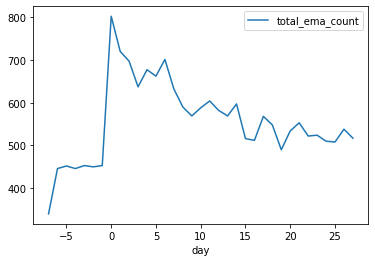

In [413]:
df_new_test.plot(x="day", y="total_ema_count")

<AxesSubplot:xlabel='day'>

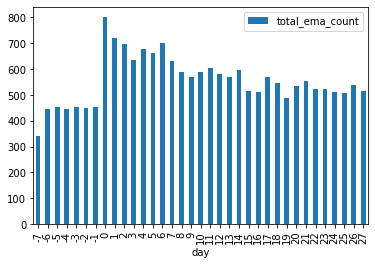

In [414]:
df_new_test.plot.bar(x="day", y="total_ema_count")

In [415]:
df_new_test = df_test.groupby('new_day').agg({'Part_ID': ['count']}).reset_index()
df_new_test.columns = ['day', 'total_individuals']
df_new_test

,day,total_individuals
0,-7,340
1,-6,446
2,-5,452
3,-4,446
4,-3,453
...,...,...
30,23,524
31,24,510
32,25,508
33,26,538


<AxesSubplot:xlabel='day'>

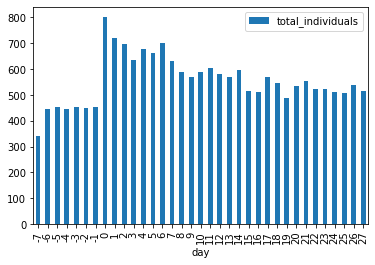

In [416]:
df_new_test.plot.bar(x="day", y="total_individuals")

In [174]:
tvem_df_1 = tvem_df_1[tvem_df_1['Part_ID'].isin(filtered_part_id_list)]
tvem_df_1 = tvem_df_1.set_index([list(np.arange(tvem_df_1.shape[0]))])
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
0,Pre - Quit Random,31032,1,2005-05-26 13:49:51,2005-06-02,-7,Complete,0.576,0.542,NaN,0.000,0.000,1,0,1,5.0,4,0.0,4,3,2,1,1,2,2,2,4,3,1,1,1,4.0
1,Pre - Quit Random,31032,1,2005-05-26 16:58:15,2005-06-02,-7,Complete,0.707,0.667,0.576,0.131,0.131,1,1,1,0.0,3,4.0,4,4,2,1,1,1,1,2,4,3,1,1,1,0.0
2,Pre - Quit Random,31032,1,2005-05-26 21:51:27,2005-06-02,-7,Complete,0.910,0.875,0.707,0.203,0.203,1,1,1,2.0,3,0.0,4,5,2,1,1,1,1,1,4,2,1,1,1,1.0
3,Pre - Quit Random,31032,2,2005-05-27 09:35:11,2005-06-02,-6,Complete,1.399,0.375,0.910,0.489,0.489,1,1,1,3.0,4,1.0,4,3,2,1,1,3,2,2,4,4,4,4,3,2.0
4,Pre - Quit Random,31032,2,2005-05-27 10:53:10,2005-06-02,-6,Complete,1.453,0.417,1.399,0.054,0.054,1,1,1,3.0,4,2.0,4,4,2,1,1,2,2,1,4,4,3,3,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19502,Post - Quit Random,31832,34,2007-05-19 20:36:48,2007-04-23,26,Complete,33.858,0.833,33.758,0.100,0.100,1,1,1,0.0,5,0.0,5,5,2,2,2,2,2,2,5,5,1,1,1,0.0
19503,Post - Quit Random,31832,35,2007-05-20 15:08:21,2007-04-23,27,Complete,34.630,0.625,33.858,0.772,0.772,1,1,1,0.0,4,0.0,4,4,2,2,1,1,2,2,4,4,1,1,1,0.0
19504,Post - Quit Random,31832,35,2007-05-20 16:51:44,2007-04-23,27,Complete,34.702,0.667,34.630,0.072,0.072,1,1,1,0.0,5,0.0,4,3,2,2,2,2,2,2,4,3,1,1,1,0.0
19505,Post - Quit Random,31832,35,2007-05-20 18:57:34,2007-04-23,27,Complete,34.790,0.750,34.702,0.088,0.088,1,1,1,0.0,5,0.0,4,4,2,2,1,2,2,2,4,3,1,1,1,0.0


In [175]:
high_delta_df = tvem_df_1[tvem_df_1['day_time_delta']>=1]
high_delta_df

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
713,Post - Quit Random,31070,21,2005-06-26 20:39:37,2005-06-13,13,Missing,20.860,0.833,19.267,1.593,1.593,0,1,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1169,Post - Quit Random,31080,13,2005-06-26 22:33:39,2005-06-21,5,Complete,12.940,0.917,11.914,1.026,1.026,1,1,0,0.0,4,0.0,4,4,2,4,2,2,2,2,4,4,2,2,2,0.0
1588,Pre - Quit Random,31102,3,2005-06-29 20:45:56,2005-07-04,-5,Complete,2.865,0.833,1.741,1.124,0.000,1,0,0,0.0,4,0.0,4,4,1,1,1,1,1,1,4,4,2,2,2,0.0
6983,Post - Quit Random,31292,23,2005-10-25 17:10:08,2005-10-10,15,Complete,22.715,0.708,21.385,1.330,1.330,1,1,1,0.0,2,0.0,3,3,2,4,4,3,4,4,3,3,2,2,2,0.0
7498,Pre - Quit Random,31344,5,2005-11-06 10:56:21,2005-11-09,-3,Missing,4.455,0.417,3.380,1.075,0.000,0,0,0,0.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13774,Post - Quit Random,31554,35,2006-11-26 14:10:55,2006-10-30,27,Complete,34.590,0.583,33.485,1.105,1.105,1,1,1,0.0,4,0.0,3,4,4,3,4,4,4,4,4,3,3,3,3,0.0
14209,Post - Quit Random,31578,29,2006-10-30 20:11:45,2006-10-09,21,Complete,28.841,0.833,27.018,1.823,1.823,1,1,1,0.0,4,0.0,3,3,2,2,2,3,3,3,4,3,4,3,3,0.0
15868,Post - Quit Random,31662,30,2007-01-03 11:28:06,2006-12-12,22,Missing,29.478,0.458,28.407,1.071,0.000,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
17017,Pre - Quit Random,31704,6,2006-12-18 20:44:14,2006-12-20,-2,Complete,5.864,0.833,4.007,1.857,1.857,1,1,1,3.0,1,0.0,3,4,1,1,1,1,1,1,3,3,2,2,2,2.0


In [45]:
tvem_df_1 = tvem_df_1[tvem_df_1['day_time_delta']<1]
tvem_df_1

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3
14483,Pre - Quit Random,31017,1,2005-05-10 16:10:23,2005-05-16,-6,Complete,1.674,0.667,NaN,0.000,1,0,1,NaN,2,5,2,3,2,3,4,4,4,3,3,5,5,5
14484,Pre - Quit Random,31017,1,2005-05-10 18:24:02,2005-05-16,-6,Complete,1.767,0.750,1.674,0.093,1,1,1,4.0,4,5,2,3,4,5,5,5,4,3,3,5,5,5
14485,Pre - Quit Random,31017,2,2005-05-11 08:14:04,2005-05-16,-5,Complete,2.343,0.333,1.767,0.576,1,1,1,NaN,4,5,5,2,2,1,1,2,2,5,5,5,5,5
14486,Pre - Quit Random,31017,2,2005-05-11 11:57:54,2005-05-16,-5,Complete,2.498,0.458,2.343,0.155,1,1,1,NaN,4,4,5,1,1,1,3,3,2,4,4,2,3,2
14487,Pre - Quit Random,31017,2,2005-05-11 14:23:53,2005-05-16,-5,Complete,2.599,0.583,2.498,0.101,1,1,0,NaN,4,4,4,2,1,1,3,3,2,4,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,Post - Quit Random,31841,29,2007-05-29 16:15:05,2007-05-08,21,Missing,28.677,0.667,28.578,0.099,0,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45640,Post - Quit Random,31841,29,2007-05-29 17:25:59,2007-05-08,21,Complete,28.726,0.708,28.677,0.049,1,0,0,NaN,4,5,5,1,1,1,3,1,1,3,3,1,1,1
10911,Post - Quit Random,31841,30,2007-05-30 10:36:36,2007-05-08,22,Missing,29.442,0.417,28.726,0.716,0,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45641,Post - Quit Random,31841,30,2007-05-30 12:43:08,2007-05-08,22,Complete,29.530,0.500,29.442,0.088,1,0,0,NaN,5,4,4,1,1,1,3,2,1,5,5,1,1,1


In [177]:
max(tvem_df_1['day_time_delta'])

0.984

In [178]:
#tvem_df_1[tvem_df_1['Part_ID']==31536].sort_values(by=['Part_ID','day_time'])

In [179]:
#pd.set_option("display.max_rows", 10)

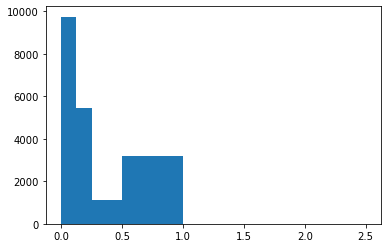

In [180]:
import matplotlib.pyplot as plt
plt.hist(tvem_df_1['day_time_delta'], bins=[0,0.12,0.25,0.5,1.0,1.25,1.5,1.75,2.0,2.25,2.5])
plt.show()

In [181]:
tvem_df_1.to_csv(r'care_ema_raw\my_data.csv', index=False)

### Data Curation for stratified data analysis with TVEM

In [182]:
'''
From the dataframe prepared above for TVEM that that contains EMAs from -7 to 27 days,
we extract those EMAs belonging to first week i.e. -7 to -1
'''
test_tvem = tvem_df_1[(tvem_df_1['new_day'] >= -7) & (tvem_df_1['new_day'] < 0)]
test_tvem

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
0,Pre - Quit Random,31032,1,2005-05-26 13:49:51,2005-06-02,-7,Complete,0.576,0.542,NaN,0.000,0.000,1,0,1,5.0,4,0.0,4,3,2,1,1,2,2,2,4,3,1,1,1,4.0
1,Pre - Quit Random,31032,1,2005-05-26 16:58:15,2005-06-02,-7,Complete,0.707,0.667,0.576,0.131,0.131,1,1,1,0.0,3,4.0,4,4,2,1,1,1,1,2,4,3,1,1,1,0.0
2,Pre - Quit Random,31032,1,2005-05-26 21:51:27,2005-06-02,-7,Complete,0.910,0.875,0.707,0.203,0.203,1,1,1,2.0,3,0.0,4,5,2,1,1,1,1,1,4,2,1,1,1,1.0
3,Pre - Quit Random,31032,2,2005-05-27 09:35:11,2005-06-02,-6,Complete,1.399,0.375,0.910,0.489,0.489,1,1,1,3.0,4,1.0,4,3,2,1,1,3,2,2,4,4,4,4,3,2.0
4,Pre - Quit Random,31032,2,2005-05-27 10:53:10,2005-06-02,-6,Complete,1.453,0.417,1.399,0.054,0.054,1,1,1,3.0,4,2.0,4,4,2,1,1,2,2,1,4,4,3,3,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19382,Pre - Quit Random,31832,6,2007-04-21 20:52:37,2007-04-23,-2,Complete,5.870,0.833,5.805,0.065,0.065,1,1,1,0.0,4,3.0,4,4,3,1,1,1,2,2,4,4,2,4,2,0.0
19383,Pre - Quit Random,31832,7,2007-04-22 16:01:48,2007-04-23,-1,Complete,6.667,0.667,5.870,0.797,0.797,1,1,1,3.0,4,0.0,4,4,3,2,1,2,2,2,4,3,3,4,3,2.0
19384,Pre - Quit Random,31832,7,2007-04-22 17:36:40,2007-04-23,-1,Complete,6.733,0.708,6.667,0.066,0.066,1,1,1,0.0,4,2.0,4,4,2,2,1,2,2,2,4,3,4,4,4,0.0
19385,Pre - Quit Random,31832,7,2007-04-22 18:45:14,2007-04-23,-1,Complete,6.781,0.750,6.733,0.048,0.048,1,1,1,0.0,3,0.0,4,4,1,1,1,1,2,2,5,4,2,2,2,0.0


In [183]:
'''
Now, with the first week's EMAs of all the individuals in hand,
we calculate average enagement for each individual so that we can distribute them with high and low engagement  
'''
#pd.set_option("display.max_rows", 10)
test_df = test_tvem.groupby(['Part_ID'])['engagement'].mean().round(2).sort_values(ascending=False).reset_index()
test_df

,Part_ID,engagement
0,31262,1.00
1,31467,1.00
2,31708,1.00
3,31813,1.00
4,31797,1.00
...,...,...
109,31479,0.22
110,31503,0.15
111,31256,0.10
112,31344,0.00


In [184]:
# calculate median taht can be used to split the individuals based on engagement
test_df['engagement'].median()

0.81

In [185]:
# prepare a list of all individuals with low engagement 
n_low = test_df[test_df['engagement'] < 0.81].Part_ID.to_list()
len(n_low)

54

In [186]:
# prepare a list of all individuals with low engagement 
n_high = test_df[test_df['engagement'] >= 0.81].Part_ID.to_list()
len(n_high)

60

In [187]:
# filter the curated tvem dataframe having all EMAs between -7 to 27 days for the high enagement individuals
df_high = tvem_df_1[tvem_df_1['Part_ID'].isin(n_high)]
df_high

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
138,Pre - Quit Random,31035,1,2005-05-25 11:01:17,2005-06-01,-7,Complete,0.459,0.458,NaN,0.000,0.000,1,0,0,0.0,3,0.0,4,4,2,2,2,2,2,3,4,3,2,2,2,0.0
139,Pre - Quit Random,31035,1,2005-05-25 12:19:43,2005-06-01,-7,Missing,0.513,0.500,0.459,0.054,0.054,0,1,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
140,Pre - Quit Random,31035,1,2005-05-25 18:50:10,2005-06-01,-7,Complete,0.785,0.750,0.513,0.272,0.000,1,0,1,3.0,3,0.0,3,4,4,2,2,2,3,2,3,3,2,2,2,2.0
141,Pre - Quit Random,31035,1,2005-05-25 20:23:26,2005-06-01,-7,Complete,0.849,0.833,0.785,0.064,0.064,1,1,1,0.0,3,2.0,4,4,3,1,1,3,3,3,4,3,3,3,3,0.0
142,Pre - Quit Random,31035,2,2005-05-26 10:09:13,2005-06-01,-6,Complete,1.423,0.417,0.849,0.574,0.574,1,1,1,3.0,3,0.0,3,4,3,2,1,3,3,3,3,3,2,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19502,Post - Quit Random,31832,34,2007-05-19 20:36:48,2007-04-23,26,Complete,33.858,0.833,33.758,0.100,0.100,1,1,1,0.0,5,0.0,5,5,2,2,2,2,2,2,5,5,1,1,1,0.0
19503,Post - Quit Random,31832,35,2007-05-20 15:08:21,2007-04-23,27,Complete,34.630,0.625,33.858,0.772,0.772,1,1,1,0.0,4,0.0,4,4,2,2,1,1,2,2,4,4,1,1,1,0.0
19504,Post - Quit Random,31832,35,2007-05-20 16:51:44,2007-04-23,27,Complete,34.702,0.667,34.630,0.072,0.072,1,1,1,0.0,5,0.0,4,3,2,2,2,2,2,2,4,3,1,1,1,0.0
19505,Post - Quit Random,31832,35,2007-05-20 18:57:34,2007-04-23,27,Complete,34.790,0.750,34.702,0.088,0.088,1,1,1,0.0,5,0.0,4,4,2,2,1,2,2,2,4,3,1,1,1,0.0


In [188]:
# filter the curated tvem dataframe having all EMAs between -7 to 27 days for the low enagement individuals
df_low = tvem_df_1[tvem_df_1['Part_ID'].isin(n_low)]
df_low

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
0,Pre - Quit Random,31032,1,2005-05-26 13:49:51,2005-06-02,-7,Complete,0.576,0.542,NaN,0.000,0.000,1,0,1,5.0,4,0.0,4,3,2,1,1,2,2,2,4,3,1,1,1,4.0
1,Pre - Quit Random,31032,1,2005-05-26 16:58:15,2005-06-02,-7,Complete,0.707,0.667,0.576,0.131,0.131,1,1,1,0.0,3,4.0,4,4,2,1,1,1,1,2,4,3,1,1,1,0.0
2,Pre - Quit Random,31032,1,2005-05-26 21:51:27,2005-06-02,-7,Complete,0.910,0.875,0.707,0.203,0.203,1,1,1,2.0,3,0.0,4,5,2,1,1,1,1,1,4,2,1,1,1,1.0
3,Pre - Quit Random,31032,2,2005-05-27 09:35:11,2005-06-02,-6,Complete,1.399,0.375,0.910,0.489,0.489,1,1,1,3.0,4,1.0,4,3,2,1,1,3,2,2,4,4,4,4,3,2.0
4,Pre - Quit Random,31032,2,2005-05-27 10:53:10,2005-06-02,-6,Complete,1.453,0.417,1.399,0.054,0.054,1,1,1,3.0,4,2.0,4,4,2,1,1,2,2,1,4,4,3,3,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18687,Relapse Random,31800,35,2007-03-12 13:51:26,2007-02-13,27,Complete,34.577,0.542,34.565,0.012,0.012,1,1,1,0.0,2,0.0,2,2,3,4,3,3,3,4,3,2,2,2,2,0.0
18688,Relapse Random,31800,35,2007-03-12 14:24:27,2007-02-13,27,Complete,34.600,0.583,34.577,0.023,0.023,1,1,1,0.0,3,0.0,3,3,2,4,3,3,5,4,3,3,3,2,2,0.0
18689,Relapse Random,31800,35,2007-03-12 15:16:01,2007-02-13,27,Complete,34.636,0.625,34.600,0.036,0.036,1,1,1,0.0,2,0.0,2,2,3,4,3,2,4,4,3,2,2,3,2,0.0
18690,Relapse Random,31800,35,2007-03-12 15:59:31,2007-02-13,27,Complete,34.666,0.625,34.636,0.030,0.030,1,1,0,0.0,4,0.0,4,4,2,2,2,4,4,4,4,4,4,4,4,0.0


In [189]:
# Now, filter the high engagment individuals' EMAs belonging from 0 to 27 days (post-quit period)
tvem_high = df_high[(df_high['new_day'] >= 0) & (df_high['new_day'] <= 27)]
tvem_high

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
165,Post - Quit Random,31035,8,2005-06-01 11:25:38,2005-06-01,0,Complete,7.476,0.458,6.933,0.543,0.543,1,1,1,0.0,3,0.0,4,3,2,2,1,3,3,3,3,3,3,3,2,0.0
166,Post - Quit Random,31035,8,2005-06-01 14:47:22,2005-06-01,0,Complete,7.616,0.583,7.476,0.140,0.140,1,1,0,0.0,3,0.0,4,3,2,1,1,3,2,2,4,3,4,3,3,0.0
167,Post - Quit Random,31035,8,2005-06-01 18:55:09,2005-06-01,0,Missing,7.788,0.750,7.616,0.172,0.172,0,1,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
168,Post - Quit Random,31035,8,2005-06-01 19:52:23,2005-06-01,0,Complete,7.828,0.792,7.788,0.040,0.000,1,0,1,0.0,3,0.0,4,4,2,1,1,2,3,2,4,3,3,2,2,0.0
169,Post - Quit Random,31035,9,2005-06-02 08:17:20,2005-06-01,1,Complete,8.345,0.333,7.828,0.517,0.517,1,1,1,0.0,3,0.0,3,2,3,2,2,3,3,3,3,3,4,3,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19502,Post - Quit Random,31832,34,2007-05-19 20:36:48,2007-04-23,26,Complete,33.858,0.833,33.758,0.100,0.100,1,1,1,0.0,5,0.0,5,5,2,2,2,2,2,2,5,5,1,1,1,0.0
19503,Post - Quit Random,31832,35,2007-05-20 15:08:21,2007-04-23,27,Complete,34.630,0.625,33.858,0.772,0.772,1,1,1,0.0,4,0.0,4,4,2,2,1,1,2,2,4,4,1,1,1,0.0
19504,Post - Quit Random,31832,35,2007-05-20 16:51:44,2007-04-23,27,Complete,34.702,0.667,34.630,0.072,0.072,1,1,1,0.0,5,0.0,4,3,2,2,2,2,2,2,4,3,1,1,1,0.0
19505,Post - Quit Random,31832,35,2007-05-20 18:57:34,2007-04-23,27,Complete,34.790,0.750,34.702,0.088,0.088,1,1,1,0.0,5,0.0,4,4,2,2,1,2,2,2,4,3,1,1,1,0.0


In [190]:
tvem_high.to_csv(r'care_ema_raw\my_data_high.csv', index=False)

In [191]:
# Now, filter the low engagment individuals' EMAs from 0 to 27 days (post-quit period)
tvem_low = df_low[(df_low['new_day'] >= 0) & (df_low['new_day'] <= 27)]
tvem_low

,asse_name,Part_ID,Day,Initiated,Final_Quit_Date,new_day,status,day_time,time_of_day,day_time_lagged,day_time_delta,previous_ema_engagement_day_time_delta,engagement,previous_ema_engagement,next_ema_engagement,Smoking_Items2,Enthusiastic,previous_ema_smoking_qty,happy,relaxed,bored,sad,angry,anxious,restless,stressed,overallmood,energylevel,Urge1,Urge2,Urge3,smoking_qty
27,Post - Quit Random,31032,8,2005-06-02 07:52:36,2005-06-02,0,Complete,7.328,0.292,6.765,0.563,0.000,1,0,1,0.0,2,0.0,4,3,3,3,2,4,3,3,3,3,3,2,2,0.0
28,Post - Quit Random,31032,8,2005-06-02 13:04:24,2005-06-02,0,Complete,7.545,0.542,7.328,0.217,0.217,1,1,1,0.0,4,0.0,4,3,2,2,1,3,2,3,3,3,3,3,2,0.0
29,Post - Quit Random,31032,8,2005-06-02 16:30:52,2005-06-02,0,Complete,7.688,0.667,7.545,0.143,0.143,1,1,0,0.0,4,0.0,4,3,2,1,1,3,3,2,4,3,2,2,2,0.0
30,Post - Quit Random,31032,8,2005-06-02 18:18:21,2005-06-02,0,Missing,7.763,0.750,7.688,0.075,0.075,0,1,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
31,Post - Quit Random,31032,9,2005-06-03 08:02:47,2005-06-02,1,Complete,8.335,0.333,7.763,0.572,0.000,1,0,0,0.0,3,0.0,4,4,2,2,2,2,2,2,4,3,5,5,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18687,Relapse Random,31800,35,2007-03-12 13:51:26,2007-02-13,27,Complete,34.577,0.542,34.565,0.012,0.012,1,1,1,0.0,2,0.0,2,2,3,4,3,3,3,4,3,2,2,2,2,0.0
18688,Relapse Random,31800,35,2007-03-12 14:24:27,2007-02-13,27,Complete,34.600,0.583,34.577,0.023,0.023,1,1,1,0.0,3,0.0,3,3,2,4,3,3,5,4,3,3,3,2,2,0.0
18689,Relapse Random,31800,35,2007-03-12 15:16:01,2007-02-13,27,Complete,34.636,0.625,34.600,0.036,0.036,1,1,1,0.0,2,0.0,2,2,3,4,3,2,4,4,3,2,2,3,2,0.0
18690,Relapse Random,31800,35,2007-03-12 15:59:31,2007-02-13,27,Complete,34.666,0.625,34.636,0.030,0.030,1,1,0,0.0,4,0.0,4,4,2,2,2,4,4,4,4,4,4,4,4,0.0


In [192]:
tvem_low.to_csv(r'care_ema_raw\my_data_low.csv', index=False)

##### Analysis based on averages

In [193]:
tvem_new_df_1 = tvem_df_1.groupby(['Part_ID','new_day'])[['engagement','Enthusiastic','happy','relaxed','bored','sad','angry','anxious','restless','stressed','Urge1','Urge2','Urge3']].mean().round(2).reset_index()
tvem_new_df_1

,Part_ID,new_day,engagement,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,Urge1,Urge2,Urge3
0,31032,-7,1.00,3.33,4.00,4.00,2.00,1.00,1.00,1.33,1.33,1.67,1.00,1.00,1.00
1,31032,-6,1.00,3.50,3.75,3.25,3.00,1.25,1.00,2.50,3.25,2.00,2.50,2.50,2.00
2,31032,-5,0.75,2.25,3.00,3.00,1.75,0.75,0.75,1.00,1.25,1.00,0.75,1.00,0.75
3,31032,-4,0.25,0.75,1.00,1.00,0.50,0.25,0.25,0.75,0.50,0.50,1.00,1.00,0.75
4,31032,-3,0.25,0.75,0.75,0.75,0.50,0.50,0.50,1.00,0.75,0.75,0.50,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,31832,23,0.75,3.50,3.00,3.25,1.25,1.00,1.00,1.50,1.25,1.50,1.00,1.00,1.00
3983,31832,24,1.00,4.00,4.00,4.00,1.75,2.00,1.25,2.00,2.50,1.75,1.25,1.25,1.25
3984,31832,25,1.00,4.00,4.00,3.75,2.50,2.25,2.25,2.25,2.25,2.00,1.25,1.25,1.25
3985,31832,26,0.75,3.50,3.50,3.50,1.25,1.25,1.00,1.25,1.25,1.25,0.75,0.75,0.75


In [194]:
test_df = tvem_df_1.groupby(['Part_ID','new_day'])['Initiated'].count().reset_index()
test_df

,Part_ID,new_day,Initiated
0,31032,-7,3
1,31032,-6,4
2,31032,-5,4
3,31032,-4,4
4,31032,-3,4
...,...,...,...
3982,31832,23,4
3983,31832,24,4
3984,31832,25,4
3985,31832,26,4


In [195]:
test_df['previous_day_ema_count'] = test_df.groupby('Part_ID')['Initiated'].shift(1)
test_df['previous_day_ema_count'] = test_df['previous_day_ema_count'].fillna(0)
test_df

,Part_ID,new_day,Initiated,previous_day_ema_count
0,31032,-7,3,0.0
1,31032,-6,4,3.0
2,31032,-5,4,4.0
3,31032,-4,4,4.0
4,31032,-3,4,4.0
...,...,...,...,...
3982,31832,23,4,4.0
3983,31832,24,4,4.0
3984,31832,25,4,4.0
3985,31832,26,4,4.0


In [196]:
test_df.pop('Initiated')
test_df.pop('new_day')
test_df.pop('Part_ID')
test_df

,previous_day_ema_count
0,0.0
1,3.0
2,4.0
3,4.0
4,4.0
...,...
3982,4.0
3983,4.0
3984,4.0
3985,4.0


In [197]:
tvem_new_df_1 = pd.merge(tvem_new_df_1, test_df, left_index=True, right_index=True)
tvem_new_df_1

,Part_ID,new_day,engagement,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,Urge1,Urge2,Urge3,previous_day_ema_count
0,31032,-7,1.00,3.33,4.00,4.00,2.00,1.00,1.00,1.33,1.33,1.67,1.00,1.00,1.00,0.0
1,31032,-6,1.00,3.50,3.75,3.25,3.00,1.25,1.00,2.50,3.25,2.00,2.50,2.50,2.00,3.0
2,31032,-5,0.75,2.25,3.00,3.00,1.75,0.75,0.75,1.00,1.25,1.00,0.75,1.00,0.75,4.0
3,31032,-4,0.25,0.75,1.00,1.00,0.50,0.25,0.25,0.75,0.50,0.50,1.00,1.00,0.75,4.0
4,31032,-3,0.25,0.75,0.75,0.75,0.50,0.50,0.50,1.00,0.75,0.75,0.50,0.50,0.50,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,31832,23,0.75,3.50,3.00,3.25,1.25,1.00,1.00,1.50,1.25,1.50,1.00,1.00,1.00,4.0
3983,31832,24,1.00,4.00,4.00,4.00,1.75,2.00,1.25,2.00,2.50,1.75,1.25,1.25,1.25,4.0
3984,31832,25,1.00,4.00,4.00,3.75,2.50,2.25,2.25,2.25,2.25,2.00,1.25,1.25,1.25,4.0
3985,31832,26,0.75,3.50,3.50,3.50,1.25,1.25,1.00,1.25,1.25,1.25,0.75,0.75,0.75,4.0


In [198]:
tvem_new_df_1.rename(columns = {'engagement':'current_day_avg_engagement'}, inplace = True)

In [199]:
tvem_new_df_1['new_day'] = tvem_new_df_1['new_day'].apply(lambda x: x+7)
tvem_new_df_1['previous_day_avg_engagement'] = tvem_new_df_1.groupby('Part_ID')['current_day_avg_engagement'].shift(1)
tvem_new_df_1['previous_day_avg_engagement'] = tvem_new_df_1['previous_day_avg_engagement'].fillna(0)
tvem_new_df_1

,Part_ID,new_day,current_day_avg_engagement,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,Urge1,Urge2,Urge3,previous_day_ema_count,previous_day_avg_engagement
0,31032,0,1.00,3.33,4.00,4.00,2.00,1.00,1.00,1.33,1.33,1.67,1.00,1.00,1.00,0.0,0.00
1,31032,1,1.00,3.50,3.75,3.25,3.00,1.25,1.00,2.50,3.25,2.00,2.50,2.50,2.00,3.0,1.00
2,31032,2,0.75,2.25,3.00,3.00,1.75,0.75,0.75,1.00,1.25,1.00,0.75,1.00,0.75,4.0,1.00
3,31032,3,0.25,0.75,1.00,1.00,0.50,0.25,0.25,0.75,0.50,0.50,1.00,1.00,0.75,4.0,0.75
4,31032,4,0.25,0.75,0.75,0.75,0.50,0.50,0.50,1.00,0.75,0.75,0.50,0.50,0.50,4.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,31832,30,0.75,3.50,3.00,3.25,1.25,1.00,1.00,1.50,1.25,1.50,1.00,1.00,1.00,4.0,1.00
3983,31832,31,1.00,4.00,4.00,4.00,1.75,2.00,1.25,2.00,2.50,1.75,1.25,1.25,1.25,4.0,0.75
3984,31832,32,1.00,4.00,4.00,3.75,2.50,2.25,2.25,2.25,2.25,2.00,1.25,1.25,1.25,4.0,1.00
3985,31832,33,0.75,3.50,3.50,3.50,1.25,1.25,1.00,1.25,1.25,1.25,0.75,0.75,0.75,4.0,1.00


In [200]:
tvem_new_df_1['next_day_avg_engagement'] = tvem_new_df_1.groupby('Part_ID')['current_day_avg_engagement'].shift(-1)
tvem_new_df_1['next_day_avg_engagement'] = tvem_new_df_1['next_day_avg_engagement'].fillna(0)
tvem_new_df_1

,Part_ID,new_day,current_day_avg_engagement,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,Urge1,Urge2,Urge3,previous_day_ema_count,previous_day_avg_engagement,next_day_avg_engagement
0,31032,0,1.00,3.33,4.00,4.00,2.00,1.00,1.00,1.33,1.33,1.67,1.00,1.00,1.00,0.0,0.00,1.00
1,31032,1,1.00,3.50,3.75,3.25,3.00,1.25,1.00,2.50,3.25,2.00,2.50,2.50,2.00,3.0,1.00,0.75
2,31032,2,0.75,2.25,3.00,3.00,1.75,0.75,0.75,1.00,1.25,1.00,0.75,1.00,0.75,4.0,1.00,0.25
3,31032,3,0.25,0.75,1.00,1.00,0.50,0.25,0.25,0.75,0.50,0.50,1.00,1.00,0.75,4.0,0.75,0.25
4,31032,4,0.25,0.75,0.75,0.75,0.50,0.50,0.50,1.00,0.75,0.75,0.50,0.50,0.50,4.0,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,31832,30,0.75,3.50,3.00,3.25,1.25,1.00,1.00,1.50,1.25,1.50,1.00,1.00,1.00,4.0,1.00,1.00
3983,31832,31,1.00,4.00,4.00,4.00,1.75,2.00,1.25,2.00,2.50,1.75,1.25,1.25,1.25,4.0,0.75,1.00
3984,31832,32,1.00,4.00,4.00,3.75,2.50,2.25,2.25,2.25,2.25,2.00,1.25,1.25,1.25,4.0,1.00,0.75
3985,31832,33,0.75,3.50,3.50,3.50,1.25,1.25,1.00,1.25,1.25,1.25,0.75,0.75,0.75,4.0,1.00,1.00


In [201]:
tvem_new_df_1['all_previous_days_avg_engagement'] = round((tvem_new_df_1.groupby(['Part_ID'])['current_day_avg_engagement'].cumsum())/(tvem_new_df_1.groupby(['Part_ID'])['current_day_avg_engagement'].cumcount()+1),2)
tvem_new_df_1['all_previous_days_avg_engagement_1'] = tvem_new_df_1.groupby('Part_ID')['all_previous_days_avg_engagement'].shift(1)
tvem_new_df_1['all_previous_days_avg_engagement_1'] = tvem_new_df_1['all_previous_days_avg_engagement_1'].fillna(0)
tvem_new_df_1.pop('all_previous_days_avg_engagement')
tvem_new_df_1.rename(columns = {'all_previous_days_avg_engagement_1':'all_previous_days_avg_engagement'}, inplace = True)
tvem_new_df_1

,Part_ID,new_day,current_day_avg_engagement,Enthusiastic,happy,relaxed,bored,sad,angry,anxious,restless,stressed,Urge1,Urge2,Urge3,previous_day_ema_count,previous_day_avg_engagement,next_day_avg_engagement,all_previous_days_avg_engagement
0,31032,0,1.00,3.33,4.00,4.00,2.00,1.00,1.00,1.33,1.33,1.67,1.00,1.00,1.00,0.0,0.00,1.00,0.00
1,31032,1,1.00,3.50,3.75,3.25,3.00,1.25,1.00,2.50,3.25,2.00,2.50,2.50,2.00,3.0,1.00,0.75,1.00
2,31032,2,0.75,2.25,3.00,3.00,1.75,0.75,0.75,1.00,1.25,1.00,0.75,1.00,0.75,4.0,1.00,0.25,1.00
3,31032,3,0.25,0.75,1.00,1.00,0.50,0.25,0.25,0.75,0.50,0.50,1.00,1.00,0.75,4.0,0.75,0.25,0.92
4,31032,4,0.25,0.75,0.75,0.75,0.50,0.50,0.50,1.00,0.75,0.75,0.50,0.50,0.50,4.0,0.25,0.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,31832,30,0.75,3.50,3.00,3.25,1.25,1.00,1.00,1.50,1.25,1.50,1.00,1.00,1.00,4.0,1.00,1.00,0.89
3983,31832,31,1.00,4.00,4.00,4.00,1.75,2.00,1.25,2.00,2.50,1.75,1.25,1.25,1.25,4.0,0.75,1.00,0.89
3984,31832,32,1.00,4.00,4.00,3.75,2.50,2.25,2.25,2.25,2.25,2.00,1.25,1.25,1.25,4.0,1.00,0.75,0.89
3985,31832,33,0.75,3.50,3.50,3.50,1.25,1.25,1.00,1.25,1.25,1.25,0.75,0.75,0.75,4.0,1.00,1.00,0.89


In [202]:
tvem_new_df_1.to_csv(r'care_ema_raw\my_new_data.csv', index=False)